In [1]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class DataPrep:
    data = [{'x': -1, 'y': -1},
            {'x': -1, 'y': 1},
            {'x': 0, 'y': 1},
            {'x': 0, 'y': 3},
            {'x': 1, 'y': -1},
            {'x': 1, 'y': -3}] 
    @classmethod
    def gen_df(cls):
        return pd.DataFrame(cls.data)

In [8]:
class ModelFitting:
    def __init__(self, df):
        self.mdl = SVR()
        self.mdl.fit(df[['x']], df['y'])
    
    def _predict(self, df):
        return self.mdl.predict(df[['x']])

    @staticmethod
    def _diff_calc(y1,y2):
        return np.sum((y1-y2)**2)

    def eval(self, df):
        y_hat = self._predict(df)
        y_bar = np.mean(df['y'])
        y_i = np.array(df['y'])
        SST = self._diff_calc(y_i, y_bar)
        SSE = self._diff_calc(y_i, y_hat)
        SSR = self._diff_calc(y_hat, y_bar)
        return SSR, SSE, SST
    
    def plot(self,df):
        df.plot.scatter(x='x',y='y',c='DarkBlue')
        x = np.array(range(np.min(df['x'])-1,np.max(df['x'])+2)).reshape(-1, 1)
        y = self.mdl.predict(x)
        plt.plot(x,y)

In [9]:
df = DataPrep.gen_df()
mdl_fitting = ModelFitting(df)
SSR, SSE, SST = mdl_fitting.eval(df)

/home/charles/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


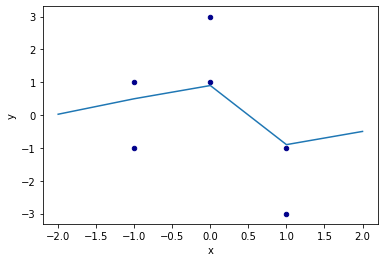

In [10]:
mdl_fitting.plot(df)

In [11]:
SST

22.0

In [12]:
SSE

11.335413691859987

In [13]:
SSR

3.735413900295664

In [14]:
SSE+SSR

15.070827592155652